# Introduction to Vectors

There are two very important foundational operations on vectors:
- addition of two vectors
- multiplication of vectors by a scalar

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZK3O402wf1c')

## Addition

We can sum any number of vectors together to produce a new vector of the same dimension by adding all elements at the same index.  Below, the blue point is the result of adding `v` and `w` together.

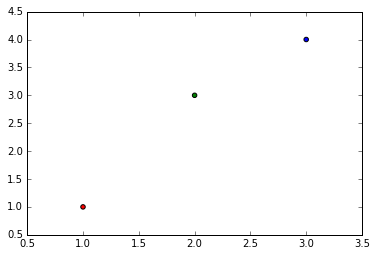

In [32]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
    
def plot_points(*points, **kwargs):
    p = filter(lambda x: isinstance(x, np.ndarray), points)
    c = filter(lambda x: isinstance(x, str), points)
    stacked = np.vstack(p)    
    fig = plt.figure()
    dim = stacked.shape[-1]
    ax = fig.add_subplot(
        111, 
        projection='3d' if dim == 3 else None)
    coords = [stacked[:, i] for i in xrange(dim)]
    ax.scatter(*coords, c=c)
    plt.show()

def plot_lines(*points, **kwargs):
    stacked = np.vstack(points)
    fig = plt.figure()
    dim = stacked.shape[-1]
    ax = fig.add_subplot(
        111, 
        projection='3d' if dim == 3 else None)
    for point in stacked:
        z = np.vstack([np.zeros(dim), point])
        coords = [z[:, i] for i in xrange(dim)]
        ax.plot(*coords)
    plt.show()
    
    

v = np.array([1, 1])
w = np.array([2, 3])
added = v + w

plot_points(v, 'r', w, 'g', added, 'b')

## Multiplication by a Scalar

We can also multiply a vector by a scalar by multiplying each element of the vector by the scalar, again resulting in a new vector of the same dimension.  Below, the blue point is the result of multiplying `w * 2`.

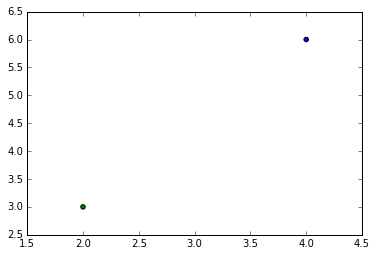

In [33]:
multiplied = w * 2
plot_points(w, 'g', multiplied, 'b')

## Linear Combinations

A linear combination is the addition and multiplication of vectors.  Below, the blue point is the linear represents the linear combination `2v + 1w`.

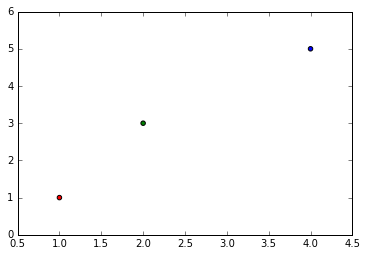

In [34]:
combination = (2 * v) + (1 * w)
plot_points(v, 'r', w, 'g', combination, 'b')

The vectors `cv` and `dw` lie along a line.

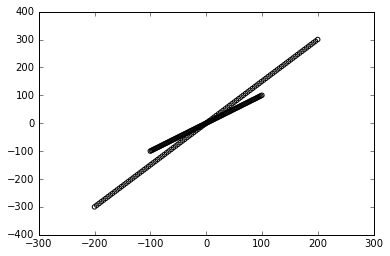

In [35]:
c = np.linspace(-100, 100, 100)[..., None]
m1 = c * v[None, ...]
m2 = c * w[None, ...]

plot_points(*np.vstack([m1, m2]))

If `w` isn't also on that line, then we can fill the entire two-dimensional space with linear combinations of the two.

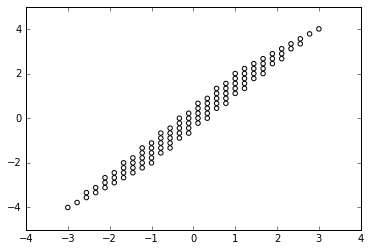

In [36]:
def linear_combinations(*vectors, **kwargs):
    v = np.vstack(vectors)
    lower = kwargs.get('lower', -1)
    upper = kwargs.get('upper', 1)
    nsamples = kwargs.get('nsamples', 10)
    c = np.linspace(lower, upper, nsamples)[..., None]
    g = np.meshgrid(*([c] * len(v)))
    combination = sum(
        [g[i].reshape((-1, 1)) * v[i] for i in xrange(len(v))])
    return combination


plot_points(*linear_combinations(v, w))

When working in `N` dimensions, we need `N` vectors (that do not lie on the same line) to fill the space.  

So, a linear combination of two vectors (again, that don't lie on a single line) in 3d space will fill a plane.

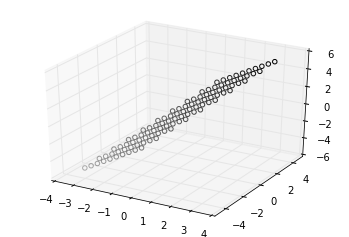

In [37]:
v = np.ones((3,))
w = np.array([2, 3, 4])
plot_points(*linear_combinations(v, w))

We can also visualize vectors as arrows from the origin:

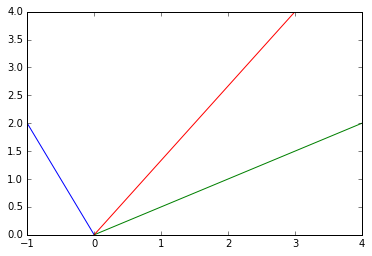

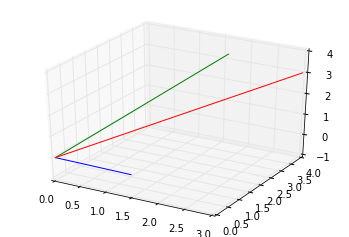

In [38]:
a = np.array([-1, 2])
b = np.array([4, 2])
c = a + b
plot_lines(a, b, c)

a = np.array([1, 1, -1])
b = np.array([2, 3, 4])
c = a + b
plot_lines(a, b, c)

## The Important Questions

Working in a three-dimensional space, and looking at all combinations of _one_ vector, we see that we get a **line**.

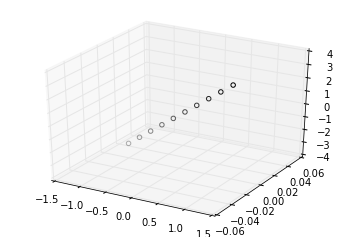

In [39]:
u = np.array([1, 0, 3])
plot_points(linear_combinations(u))

Looking at all combinations of _two_ vectors, we see that we get a **plane**.

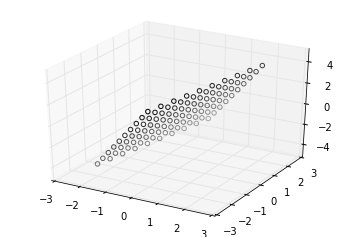

In [40]:
v = np.array([1, 2, 1])
plot_points(linear_combinations(u, v))

Finally, looking at all combinations of _three_ vectors, we see that we fill the **space**.

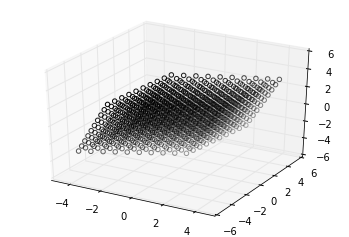

In [41]:
w = np.array([2, 3, -1])
plot_points(linear_combinations(u, v, w))

There is one caveat:  If `v` is in the same line as `u`, then we'll never leave that line, and similarly, if `w` is in the plane formed by `v` and `u`, then we'll never leave that plane and fill the space

## Worked Examples

### 1.1A
The linear combinations of `v = [1, 1, 0] and w = [0, 1, 1]` fill a plane in three dimensions.  Describe that plane, and fine a point _not_ on that plane

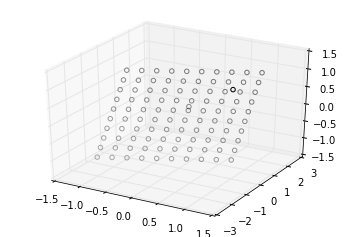

In [42]:
a = np.array([1, 1, 0])
b = np.array([0, 1, 1])
c = np.array([1, 0, 1])
d = np.array([0.1, 0.3, 0.2])
plot_points(linear_combinations(a, b), c, d)

Note that `c` is _not_ on the plane, while `d` is, and introduces an irregularity in the otherwise uniform grid of the plane.

Since `(c * [1, 1, 0]) + (d * [0, 1, 1])` fill a plane, that also means that `[c, c + d, d]` fills that plane, or, the second dimension will always be the sum of the first and third.  Put another way, element 2 is **linearly dependent** on elements one and three.

### 1.1B

For `v = [1, 0]` and `w = [0, 1]`, describe all points with
- whole numbers `c`
- non-negative numbers `c >= 0`

Then add all vectors `cv + dw` and describe the combinations.

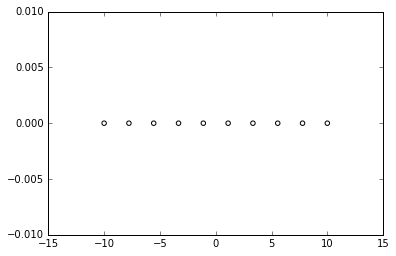

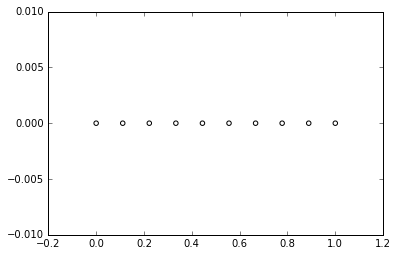

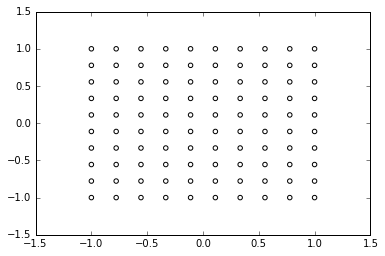

In [53]:
v = np.array([1, 0])
w = np.array([0, 1])
# whole numbers 
plot_points(linear_combinations(v, lower=-10, upper=10, nsamples=10))
# positive numbers
plot_points(linear_combinations(v, lower=0, upper=1, nsamples=10))
# combinations of v and w
plot_points(linear_combinations(v, w))

Combinations of `v` produce a line that runs along the x-axis, and linear combinations of `cv + dw` produce a regular grid that fills the two-dimensional space. Not only are the two vectors linearly independent, but they are orthogonal.  We can test this using dot products.

In [54]:
np.dot(v, w)

0